# Experiments de tipus 2 fets al dia 22/02/2021

In [3]:
from   fluids               import *
from   thermo               import Mixture
from   scipy.constants      import atmosphere, zero_Celsius, mmHg, g
import scipy                as     sci
import uncertainties 
# from   uncertainties        import *
from   uncertainties.unumpy import *
# import uncertainties        as     unumpy
from   numpy                import *
from   pandas               import *
import pandas               as pd
import matplotlib.pyplot    as plt
import numpy                as np
import uncertainties        as uc
import uncertainties.unumpy as ucu
import pwlf                             # amb aquest packet permet la interpolació lineal
# import pickle        
import math                             # amb aquest packet podem transportar informació 
from sympy import symbols, solve

In [4]:
def area(x):
    return np.pi*x**2/4
def perimetre(x):
    return np.pi*x

def chocked_mass_flow (pressure, temp,  area):
        gamma = 1.4
        if temp-zero_Celsius < 0:
            print("has de sumar-hi el conversor de k a ºC")
        else:    
            air = Mixture( 'air' , T = temp , P = pressure )
            r   = sci.constants.R / air.MW * 1000
   
            d   = gamma+1
            e   = 2*(gamma-1)
    
            A   = pressure * area
            B   = (r*temp) **(-0.5)
            C   = (gamma ) **0.5
            D   = (  2 / d  )**(d/e)
            
        return  A * B * C * D
    

In [5]:
#### Dades ambientals de l'experiment
p_atm_mm = 741
rho_hg = 13534
temp = 16 + zero_Celsius


p_atm = g * rho_hg * p_atm_mm/1e3
airN = Mixture( 'air' , T = temp , P = atmosphere )
r   = sci.constants.R / airN.MW * 1000
k   = airN.isentropic_exponent
muN  = airN.mu
rhoN = airN.rho

##### Dades generals experiment

d_chiclet = 2.75   # mm
a_chiclet = area(d_chiclet/1e3)

In [6]:
###### Dades dels calderins  ####
d_100 = 0.375
d_200 = 0.6
d_500 = 0.6

l_100 = 0.91
l_200 = 0.71
l_500 = 1.77

d_e_100 =
d_e_200 =
d_e_500 =

# volum*gruix/area --> relació important [m2]
#500/ 4
#100/1.3
#area/volum 

###### Tractament dades calderins
a_100 = area(d_100)
a_200 = area(d_200)
a_500 = area(d_500)

p_100 = perimetre(d_100)
p_200 = perimetre(d_200)
p_500 = perimetre(d_500)


v_100 = a_100 * l_100
v_200 = a_200 * l_200
v_500 = a_500 * l_500

at_100 = p_100 * l_100 + 2 *a_100
at_200 = p_200 * l_200 + 2 *a_200
at_500 = p_500 * l_500 + 2 *a_500

av_100 = a_100/v_100
av_200 = a_200/v_200
av_500 = a_500/v_500

print(round(v_100,4),"m3")
print(round(v_200,4),"m3")
print(round(v_500,4),"m3")

0.1005 m3
0.2007 m3
0.5005 m3


In [7]:
print(round(av_100,2))
print(round(av_200,2))
print(round(av_500,2))

1.1
1.41
0.56


In [8]:
print(round(l_100/d_100,2))
print(round(l_200/d_200,2))
print(round(l_500/d_500,2))

2.43
1.18
2.95


In [9]:
data100 = pd.read_csv ('Experiment2_diposit100_22022021_Vegada1.csv', sep = ';')
data200 = pd.read_csv ('exp2_experiment2_200L_22022021_versioQualitat.csv' , sep = ';' )
data500 = pd.read_csv ('exp2_500_2017.csv', sep = ';')

#tractem les dades
data100['buit_p'] = 100-data100.buit
data100['pressure'] = p_atm*data100.buit_p/100

data200['buit_p'] = 100-data200.buit
data200['pressure'] = p_atm*data200.buit_p/100

data500['pressure'] = data500.Pressure*1000

# Adimensionalitzem la pressió
data100['P_adim'] = data100.pressure/atmosphere
data200['P_adim'] = data200.pressure/atmosphere
data500['P_adim'] = data500.pressure/atmosphere
# print(data200)

### Comparació temps característics
Temps característic extret de l'article del Dr. Otis.
$$
\tau = \frac{mC_v}{h A_w} = \frac{\rho_N V C_V}{h A_w}
$$

La $C_V$ =  718 $J/kgK$  per l'aire  

La $h$ = 30 $W/m^2K$                 

Temps característic del primer article

$$
\tau = \frac { \rho_N V } { \dot{m_p} }
$$

Per tant farem les dues gràfiques: una per a cada temps adimensionalitzat

In [10]:
cv = 718
h_steel = 30
h_alum = 200

tau_otis_100 = rhoN *v_100 *cv/ (h_alum*at_100)
tau_otis_200 = rhoN *v_200 *cv/ (h_steel*at_200)
tau_otis_500 = rhoN *v_500 *cv/ (h_steel*at_500)

data100['t_adim_otis'] = data100.temps/tau_otis_100
data200['t_adim_otis'] = data200.temps/tau_otis_200
data500['t_adim_otis'] = data500.Time/tau_otis_500


p0_100_mean = ( data100.p0.median() + 1 )* 1e5
temp_100_mean = data100.temp.mean() + zero_Celsius
dot_m_100 = chocked_mass_flow (p0_100_mean, temp_100_mean, a_chiclet)

p0_200_mean = ( data200.P0.median() + 1 )* 1e5
temp_200_mean = data200.Temp.mean() + zero_Celsius
dot_m_200 = chocked_mass_flow (p0_200_mean, temp_200_mean, a_chiclet)

dot_m_500 = chocked_mass_flow (p0_200_mean, temp_200_mean, a_chiclet)

# print(60 *1000* dot_m_200/rhoN)
# print(p0_200_mean)
tau_100 = rhoN * v_100/(dot_m_100)
tau_200 = rhoN * v_200/(dot_m_200)
tau_500 = rhoN * v_500/(dot_m_500)

data100['t_adim'] = data100.temps/tau_100
data200['t_adim'] = data200.temps/tau_200
data500['t_adim'] = data500.Time/tau_500


## Gràfiques

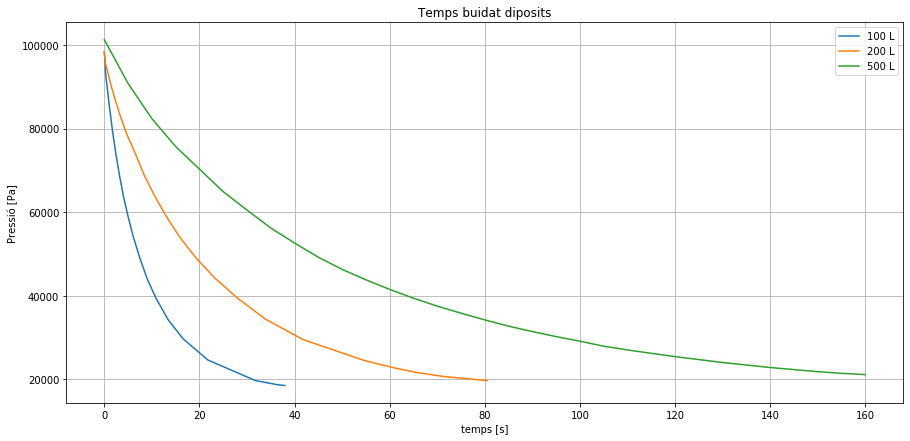

In [11]:
plt.figure(figsize=(15,7))
plt.plot (data100.temps,data100.pressure,label='100 L')
plt.plot(data200.temps,data200.pressure,label='200 L')
plt.plot(data500.Time,data500.pressure,label='500 L')
plt.xlabel('temps [s]')
plt.ylabel('Pressió [Pa]')
plt.title('Temps buidat diposits')
plt.legend()
plt.grid()

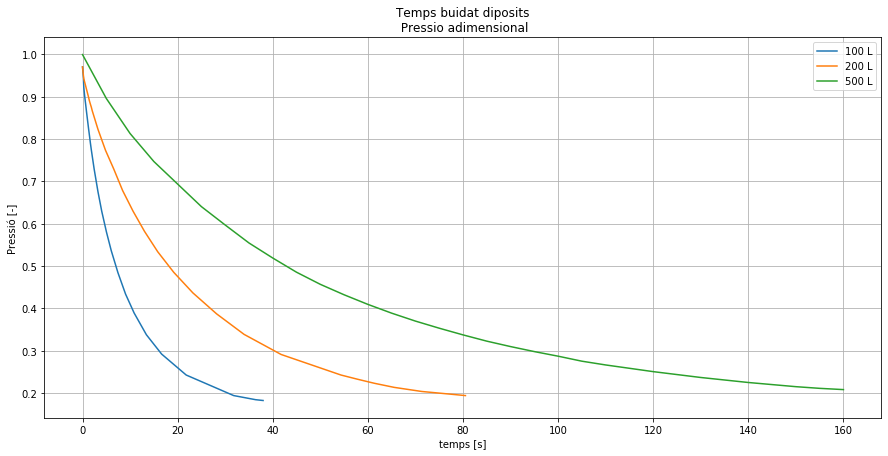

In [12]:
plt.figure(figsize=(15,7))
plt.plot (data100.temps,data100.P_adim,label='100 L')
plt.plot(data200.temps,data200.P_adim,label='200 L')
plt.plot(data500.Time,data500.P_adim,label='500 L')
plt.xlabel('temps [s]')
plt.ylabel('Pressió [-]')
plt.title('Temps buidat diposits\n Pressio adimensional')
plt.legend()
plt.grid()

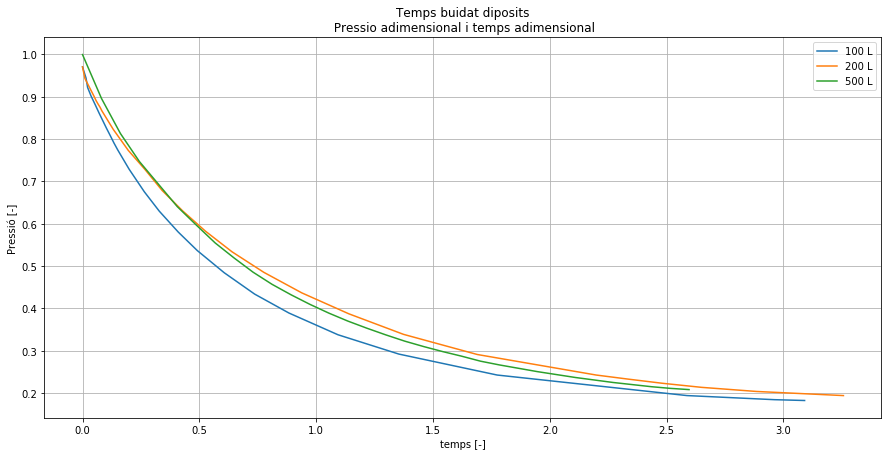

In [13]:
plt.figure(figsize=(15,7))
plt.plot (data100.t_adim,data100.P_adim,label='100 L')
plt.plot(data200.t_adim,data200.P_adim,label='200 L')
plt.plot(data500.t_adim,data500.P_adim,label='500 L')
plt.xlabel('temps [-]')
plt.ylabel('Pressió [-]')
plt.title('Temps buidat diposits\n Pressio adimensional i temps adimensional')
plt.legend()
plt.grid()

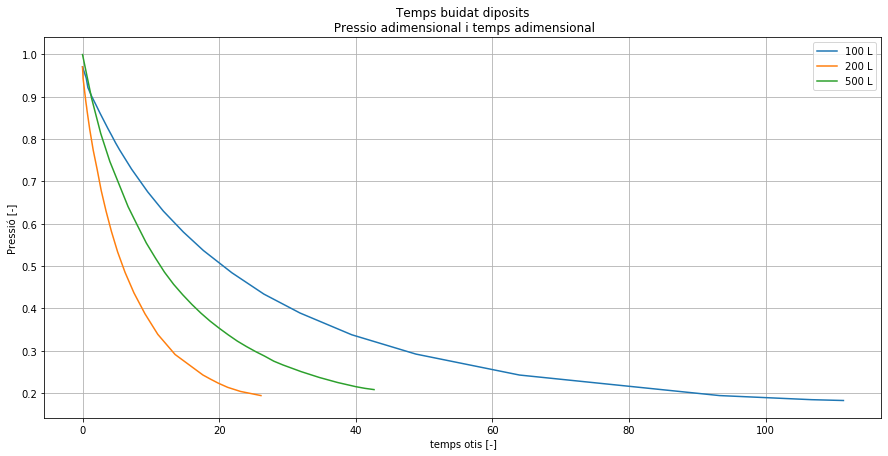

In [14]:
plt.figure(figsize=(15,7))
plt.plot (data100.t_adim_otis,data100.P_adim,label='100 L')
plt.plot(data200.t_adim_otis,data200.P_adim,label='200 L')
plt.plot(data500.t_adim_otis,data500.P_adim,label='500 L')
plt.xlabel('temps otis [-]')
plt.ylabel('Pressió [-]')
plt.title('Temps buidat diposits\n Pressio adimensional i temps adimensional')
plt.legend()
plt.grid()
plt.savefig('temps_otis.png')

## Analitzem l'evolució de la 'k'.
Després de calcular la K, l'objectiu serà d'aplicar-ho a les dades de la simulació i veure si hi ha gaire diferència

Aquesta k prové del coeficient que relaciona el gradent de pressió amb el fluxe màssic
$$
\dot{m} = -\frac{V}{krT}\frac{\text{d}p_s}{\text{d}t} \Rightarrow k = -\frac{1}{\dot{m}}\frac{V}{rT}\frac{\text{d}p_s}{\text{d}t}
$$

$\dot{m}$ prové de les mesures experimentals "estàtiques". La derivada de la pressió prové de les mesures experimentals transitòries (buidat del dipòsit)


In [15]:
PvsMu = pd.read_csv ( 'PvsMu.csv' , sep = ';' )

x         = PvsMu.p_vess_dim
y         = PvsMu.mdot

my_pwlf   = pwlf.PiecewiseLinFit( x , y )  #inicia aquí la sequencia del piecewiselinealfit 
res       = my_pwlf.fit( 2 )
# print(PvsMu)
xprova = np.linspace(0,100,100)
yprova = my_pwlf.predict(xprova)
# print(yprova)

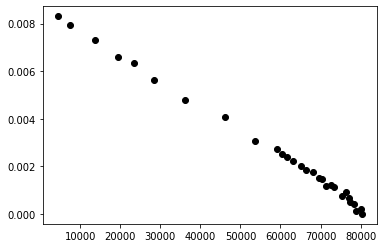

In [16]:
plt.plot (PvsMu.p_vess,PvsMu.mdot,'ko')

In [17]:
data100['dpdt'] = np.gradient( data100.pressure , data100.temps )

data100         = data100.sort_values( by   = 'pressure')
data100         = data100.reset_index( drop = 'True')      

data100['mdot_s']      = my_pwlf.predict(data100.p_vess) 
# print(data100.mdot_s)
data100['k']      = -v_100 * data100.dpdt / ( data100.mdot_s * r * temp ) # Pressure is in kPa
plt.plot(data100.temps , data100.k)

AttributeError: 'DataFrame' object has no attribute 'p_vess'

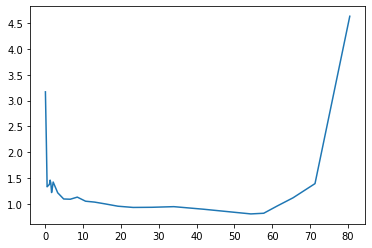

In [18]:
data200['dpdt'] = np.gradient( data200.pressure , data200.temps )

data200         = data200.sort_values( by   = 'pressure')
data200         = data200.reset_index( drop = 'True')      

data200['mdot_s']      = my_pwlf.predict(data200.P_adim)   
data200['k']      = -v_200 * data200.dpdt / ( data200.mdot_s * r * temp )  # Pressure is in kPa
plt.plot(data200.temps , data200.k)

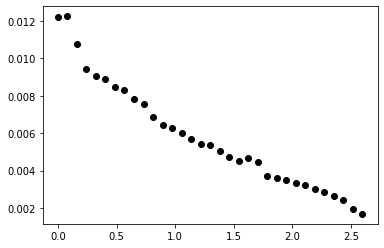

In [19]:
data500['dpdt'] = np.gradient( data500.Pressure , data500.Time )

data500         = data500.sort_values( by   = 'pressure')
data500         = data500.reset_index( drop = 'True')      

data500['mdot_s']      = my_pwlf.predict(data500.Pressure)   
data500['k']      = -v_500 * data500.dpdt / ( data500.mdot_s * r * temp ) * 1000 # Pressure is in kPa


plt.plot(data500.t_adim , data500.k,'ko')